In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo
from scipy.interpolate import griddata
from datetime import datetime, timedelta
import gsw
import datetime
import cartopy.crs as ccrs
from pathlib import Path
import cmasher as cmr
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

xr.set_options(keep_attrs=True)
plt.rcParams['font.size']=14

In [15]:
# no EDMF
ds_no=xr.open_mfdataset('/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_nomfc/*6425s_201606_EXP_tpre02_prsn02_2012_nomfc.nc')

# original EDMF
ds_c0=xr.open_mfdataset('/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_mfcori/*6425s_201606_EXP_tpre02_prsn02_2012_mfcorgi.nc')

# EDMF case 1 - alpha +beta
ds_c1=xr.open_mfdataset('/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_edmfc1/*6425s_201606_EXP_tpre02_prsn02_2012_edmfc1.nc')
# EDMF case 2  - density
ds_c2=xr.open_mfdataset('/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_edmfc2/*6425s_201606_EXP_tpre02_prsn02_2012_edmfc2.nc')

# EDMF case 4 - background value
ds_c4=xr.open_mfdataset('/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012/*6425s_201606_EXP_tpre02_prsn02_2012.nc')

# EDMF case 4 - background value
ds_no_p0=xr.open_mfdataset('/home/birte/Maud12_sensitivityruns/EXP_tpre00_prsn00_2012_nomfc/*6425s_201606_EXP_tpre00_prsn00_2012_nomfc.nc')

# Bathymetry
bat=xr.open_dataset('/home/birte/MAUD_RISE_config/maud_v4/m12_mask/1_domain_cfg_50levels_new.nc')
bat.coords['lon']=bat.nav_lon
bat.coords['lat']=bat.nav_lat
bat

<xarray.Dataset>
Dimensions:       (x: 295, y: 270, z: 50)
Coordinates:
    lon           (y, x) float32 ...
    lat           (y, x) float32 ...
Dimensions without coordinates: x, y, z
Data variables: (12/41)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    jpiglo        int32 ...
    jpjglo        int32 ...
    jpkglo        int32 ...
    ...            ...
    e3f_0         (z, y, x) float64 ...
    e3uw_0        (z, y, x) float64 ...
    e3vw_0        (z, y, x) float64 ...
    bottom_level  (y, x) int32 ...
    top_level     (y, x) int32 ...
    bathy_meter   (y, x) float32 ...

In [13]:
ds_no

<xarray.Dataset>
Dimensions:         (month: 1, x_c: 295, year: 1, z_c: 50)
Coordinates:
  * year            (year) int64 2016
  * month           (month) int64 6
  * x_c             (x_c) int64 0 1 2 3 4 5 6 7 ... 288 289 290 291 292 293 294
    y_c             int64 197
  * z_c             (z_c) int64 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
    nav_lat_grid_T  (x_c) float32 dask.array<chunksize=(295,), meta=np.ndarray>
    nav_lon_grid_T  (x_c) float32 dask.array<chunksize=(295,), meta=np.ndarray>
    glamt           (x_c) float64 dask.array<chunksize=(295,), meta=np.ndarray>
    gphit           (x_c) float64 dask.array<chunksize=(295,), meta=np.ndarray>
    depth           (z_c) float64 0.5112 1.585 2.722 ... 5.499e+03 5.957e+03
Data variables:
    S6425s_201606   (year, month, z_c, x_c) float32 dask.array<chunksize=(1, 1, 50, 295), meta=np.ndarray>
    T6425s_201606   (year, month, z_c, x_c) float32 dask.array<chunksize=(1, 1, 50, 295), meta=np.ndarray>

In [20]:
ds_no.coords['depth']=(bat.e3t_1d.cumsum(dim='z')- 0.5*bat.e3t_1d.isel(z=0)).swap_dims({'z':'z_c'})
ds_c0.coords['depth']=(bat.e3t_1d.cumsum(dim='z')- 0.5*bat.e3t_1d.isel(z=0)).swap_dims({'z':'z_c'})
ds_c1.coords['depth']=(bat.e3t_1d.cumsum(dim='z')- 0.5*bat.e3t_1d.isel(z=0)).swap_dims({'z':'z_c'})
ds_c2.coords['depth']=(bat.e3t_1d.cumsum(dim='z')- 0.5*bat.e3t_1d.isel(z=0)).swap_dims({'z':'z_c'})
ds_c4.coords['depth']=(bat.e3t_1d.cumsum(dim='z')- 0.5*bat.e3t_1d.isel(z=0)).swap_dims({'z':'z_c'})
ds_no_p0.coords['depth']=(bat.e3t_1d.cumsum(dim='z')- 0.5*bat.e3t_1d.isel(z=0)).swap_dims({'z':'z_c'})

In [21]:
ds_no

<xarray.Dataset>
Dimensions:         (month: 1, x_c: 295, year: 1, z_c: 50)
Coordinates:
  * year            (year) int64 2016
  * month           (month) int64 6
  * x_c             (x_c) int64 0 1 2 3 4 5 6 7 ... 288 289 290 291 292 293 294
    y_c             int64 197
  * z_c             (z_c) int64 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
    nav_lat_grid_T  (x_c) float32 dask.array<chunksize=(295,), meta=np.ndarray>
    nav_lon_grid_T  (x_c) float32 dask.array<chunksize=(295,), meta=np.ndarray>
    glamt           (x_c) float64 dask.array<chunksize=(295,), meta=np.ndarray>
    gphit           (x_c) float64 dask.array<chunksize=(295,), meta=np.ndarray>
    depth           (z_c) float64 0.5112 1.585 2.722 ... 5.499e+03 5.957e+03
Data variables:
    S6425s_201606   (year, month, z_c, x_c) float32 dask.array<chunksize=(1, 1, 50, 295), meta=np.ndarray>
    T6425s_201606   (year, month, z_c, x_c) float32 dask.array<chunksize=(1, 1, 50, 295), meta=np.ndarray>

In [38]:
(ds_c0.T6425s_201606-ds_c1.T6425s_201606).isel(month=0,year=0).min().values

array(0., dtype=float32)

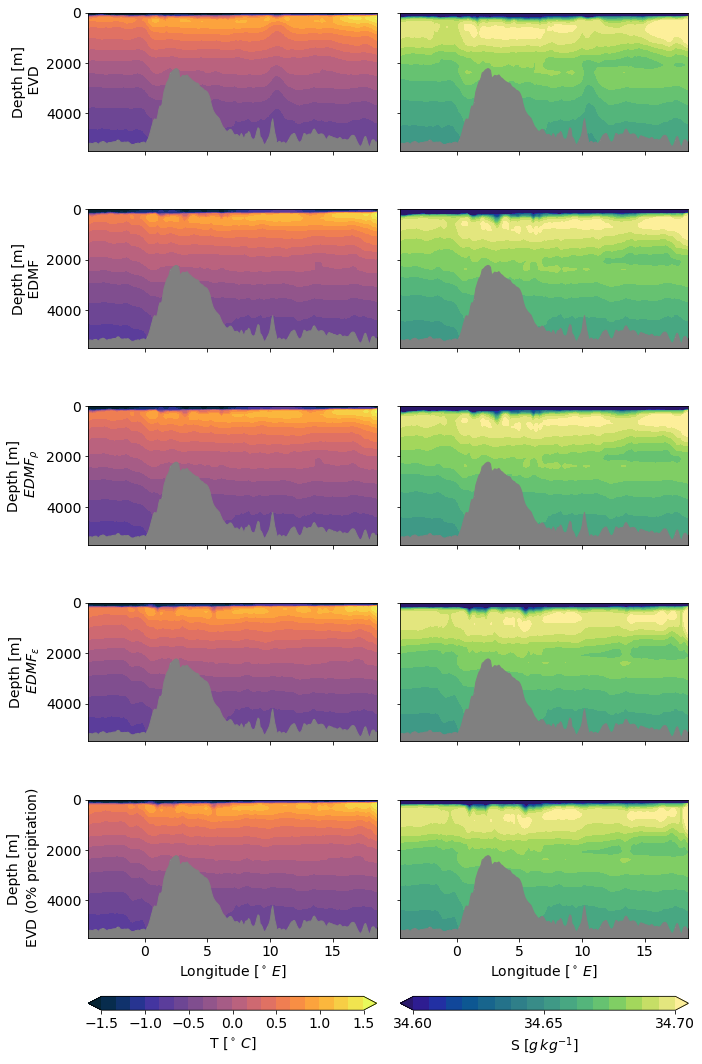

In [62]:
fig,axes=plt.subplots(6,2,figsize=(10,15),gridspec_kw={'height_ratios':[1,1,1,1,1,0.1]})


# plot velocity section ( july to september mean, 2007-2017)
tlev=19
tmin=-1.5
tmax=-1*tmin
cmapt=cmo.thermal
ax=axes[0,0]
ds_no.T6425s_201606.isel(month=0,year=0).plot.contourf(x="glamt",y="depth",ax=ax,vmin=tmin,vmax=tmax,levels=tlev,cmap=cmapt,add_colorbar=False)
ax.fill_between(ds_no.glamt,bat.bathy_meter.isel(y=197),6000,color='grey')
ax.set_ylim(0,5500)
ax.invert_yaxis()
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Depth [m]\n EVD')
ax.set_title('')
ax.set_xlim((-4.5,18.5))

ax=axes[1,0]
ds_c0.T6425s_201606.isel(month=0,year=0).plot.contourf(x="glamt",y="depth",ax=ax,vmin=tmin,vmax=tmax,levels=tlev,cmap=cmapt,add_colorbar=False)
ax.fill_between(ds_c0.glamt,bat.bathy_meter.isel(y=197),6000,color='grey')
ax.set_ylim(0,5500)
ax.invert_yaxis()
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Depth [m]\n EDMF ')
ax.set_title('')
ax.set_xlim((-4.5,18.5))

ax=axes[2,0]
ds_c2.T6425s_201606.isel(month=0,year=0).plot.contourf(x="glamt",y="depth",ax=ax,vmin=tmin,vmax=tmax,levels=tlev,cmap=cmapt,add_colorbar=False)
ax.fill_between(ds_c2.glamt,bat.bathy_meter.isel(y=197),6000,color='grey')
ax.set_ylim(0,5500)
ax.invert_yaxis()
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Depth [m]\n $EDMF_{\\rho}$ ')
ax.set_title('')
ax.set_xlim((-4.5,18.5))

ax=axes[3,0]
ds_c4.T6425s_201606.isel(month=0,year=0).plot.contourf(x="glamt",y="depth",ax=ax,vmin=tmin,vmax=tmax,levels=tlev,cmap=cmapt,add_colorbar=False)
ax.fill_between(ds_c4.glamt,bat.bathy_meter.isel(y=197),6000,color='grey')
ax.set_ylim(0,5500)
ax.invert_yaxis()
ax.set_xlabel('')
ax.set_ylabel('Depth [m]\n $EDMF_{\\epsilon}$ ')
ax.set_title('')
ax.set_xticklabels('')
ax.set_xlim((-4.5,18.5))

ax=axes[4,0]
cbt=ds_c4.T6425s_201606.isel(month=0,year=0).plot.contourf(x="glamt",y="depth",ax=ax,vmin=tmin,vmax=tmax,levels=tlev,cmap=cmapt,add_colorbar=False)
ax.fill_between(ds_c4.glamt,bat.bathy_meter.isel(y=197),6000,color='grey')
ax.set_ylim(0,5500)
ax.invert_yaxis()
ax.set_xlabel('Longitude [$^\circ\,E$]')

ax.set_ylabel('Depth [m]\n EVD (0$\%$ precipitation) ')
ax.set_title('')
ax.set_xlim((-4.5,18.5))

plt.colorbar(cbt,cax=axes[5,0],orientation='horizontal',label='T [$^\circ\,C$]',ticks=np.arange(-1.5,2,.5))


# plot S section ( june 2016)
slev=17
smin=34.6
smax=34.7
cmaps=cmo.haline
ax=axes[0,1]
ds_no.S6425s_201606.isel(month=0,year=0).plot.contourf(x="glamt",y="depth",ax=ax,vmin=smin,vmax=smax,levels=slev,cmap=cmaps,add_colorbar=False)
ax.fill_between(ds_no.glamt,bat.bathy_meter.isel(y=197),6000,color='grey')
ax.set_ylim(0,5500)
ax.invert_yaxis()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.set_xlim((-4.5,18.5))

ax=axes[1,1]
ds_c0.S6425s_201606.isel(month=0,year=0).plot.contourf(x="glamt",y="depth",ax=ax,vmin=smin,vmax=smax,levels=slev,cmap=cmaps,add_colorbar=False)
ax.fill_between(ds_c0.glamt,bat.bathy_meter.isel(y=197),6000,color='grey')
ax.set_ylim(0,5500)
ax.invert_yaxis()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.set_xlim((-4.5,18.5))

ax=axes[2,1]
ds_c2.S6425s_201606.isel(month=0,year=0).plot.contourf(x="glamt",y="depth",ax=ax,vmin=smin,vmax=smax,levels=slev,cmap=cmaps,add_colorbar=False)
ax.fill_between(ds_c2.glamt,bat.bathy_meter.isel(y=197),6000,color='grey')
ax.set_ylim(0,5500)
ax.invert_yaxis()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.set_xlim((-4.5,18.5))

ax=axes[3,1]
ds_c4.S6425s_201606.isel(month=0,year=0).plot.contourf(x="glamt",y="depth",ax=ax,vmin=smin,vmax=smax,levels=slev,cmap=cmaps,add_colorbar=False)
ax.fill_between(ds_c4.glamt,bat.bathy_meter.isel(y=197),6000,color='grey')
ax.set_ylim(0,5500)
ax.invert_yaxis()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
ax.set_yticklabels('')
ax.set_xticklabels('')
ax.set_xlim((-4.5,18.5))

ax=axes[4,1]
cbs=ds_c4.S6425s_201606.isel(month=0,year=0).plot.contourf(x="glamt",y="depth",ax=ax,vmin=smin,vmax=smax,levels=slev,cmap=cmaps,add_colorbar=False)
ax.fill_between(ds_c4.glamt,bat.bathy_meter.isel(y=197),6000,color='grey')
ax.set_ylim(0,5500)
ax.invert_yaxis()
ax.set_xlabel('Longitude [$^\circ\,E$]')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_title('')
ax.set_xlim((-4.5,18.5))

plt.colorbar(cbs,cax=axes[5,1],orientation='horizontal',label='S [$g\, kg^{-1}$]',ticks=np.arange(34.6,34.8,.05))
plt.tight_layout()

In [46]:
print(ds_no.S6425s_201606.min().values)
print(ds_no.S6425s_201606.max().values)

34.13362
34.72805
